In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers import GRU, SimpleRNN
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC

In [ ]:
mail=pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
mail

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
mail.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
mail.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [ ]:
mail.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [ ]:
mail.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
mail.duplicated().sum()

403

##Naive Bayes Classifier

In [ ]:
# Convert labels to binary format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X = mail['v2']
y = mail['v1']

X = X.str.lower()
X = X.replace('[^a-zA-Z0-9]', ' ', regex=True)

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predictions
y_pred = nb_classifier.predict(X_test)

In [ ]:
# Predictions
y_pred_prob = nb_classifier.predict_proba(X_test)[:, 1]

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

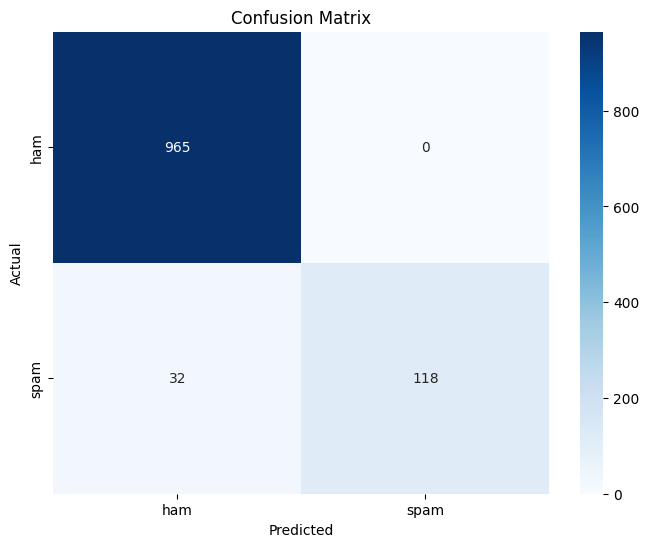

In [ ]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



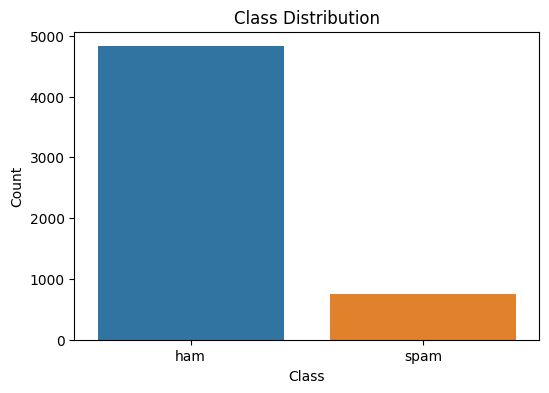

In [ ]:
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=mail)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

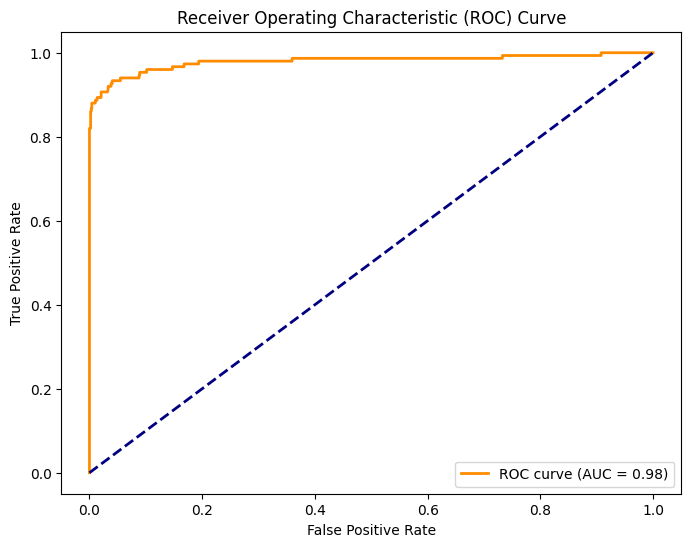

In [ ]:
from sklearn.metrics import roc_curve, auc
# Convert labels to binary format
label_mapping = {'ham': 0, 'spam': 1}
y_test_binary = np.vectorize(label_mapping.get)(y_test)

# Assuming you have already defined y_pred_proba
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##LSTM

In [ ]:
X = mail['v2']
y = mail['v1']

In [ ]:
# Convert labels to binary format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Data Preprocessing
X = X.str.lower()

In [ ]:
# Tokenize the text
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

In [ ]:
# Pad sequences to ensure equal length
max_sequence_length = 100  # You may adjust this based on your data
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
# Build LSTM Model
embedding_dim = 50  # You may adjust this based on your data
lstm_units = 100
dropout_rate = 0.2

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 5  # You may adjust this based on your data
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
126/126 [==============================] - 15s 99ms/step - loss: 0.1864 - accuracy: 0.9389 - val_loss: 0.0824 - val_accuracy: 0.9731
Epoch 2/5
126/126 [==============================] - 12s 92ms/step - loss: 0.0304 - accuracy: 0.9928 - val_loss: 0.0934 - val_accuracy: 0.9776
Epoch 3/5
126/126 [==============================] - 12s 96ms/step - loss: 0.0286 - accuracy: 0.9935 - val_loss: 0.1305 - val_accuracy: 0.9619
Epoch 4/5
126/126 [==============================] - 13s 102ms/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.0832 - val_accuracy: 0.9731
Epoch 5/5
126/126 [==============================] - 14s 109ms/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.1000 - val_accuracy: 0.9731


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

35/35 [==============================] - 1s 24ms/step - loss: 0.0546 - accuracy: 0.9857
Test Loss: 0.0546, Test Accuracy: 0.9857


##SVM

In [ ]:
# Assuming df is your DataFrame with columns 'v1' and 'v2'
# Drop unnecessary columns
mail = mail[['v1', 'v2']]

# Rename columns for clarity
mail.columns = ['label', 'text']

In [ ]:
# Convert labels to binary format
label_mapping = {'ham': 0, 'spam': 1}
mail['label'] = mail['label'].map(label_mapping)

<ipython-input-306-ffb685ebe271>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail['label'] = mail['label'].map(label_mapping)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mail['text'], mail['label'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Create and train the Linear SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_vectorized, y_train)

LinearSVC()

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_vectorized)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9830


In [ ]:
# Print classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[963   2]
 [ 17 133]]


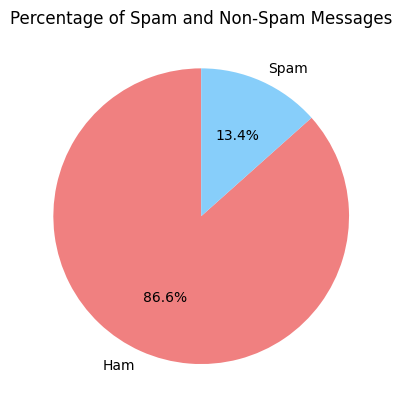

In [ ]:
# Pie chart for the percentage of spam and non-spam messages
labels = ['Ham', 'Spam']
sizes = mail['label'].value_counts(normalize=True) * 100
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Percentage of Spam and Non-Spam Messages')
plt.show()

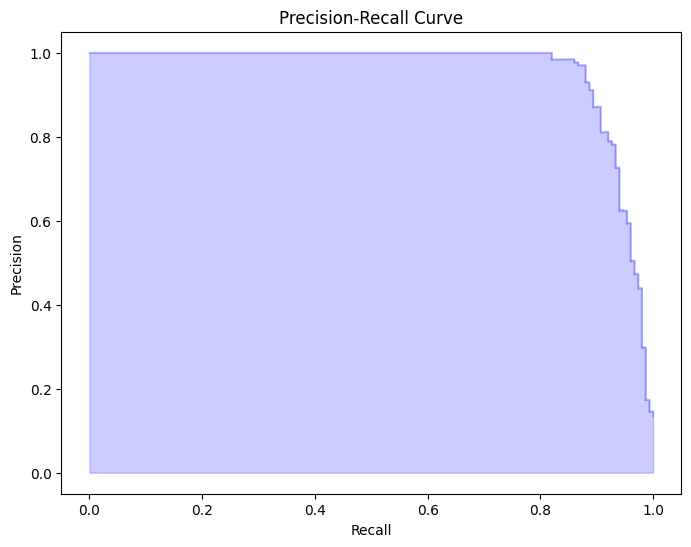

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
